# Revenue Prediction System using Linear Regression

This notebook implements a complete machine learning pipeline for predicting company revenue using Linear Regression. The system includes data preprocessing, model training, evaluation, and interactive prediction capabilities.

## Dataset Features:
- **Marketing_Spend**: Marketing expenses (numerical)
- **R&D_Spend**: Research and development expenses (numerical)
- **Administration_Costs**: Administrative expenses (numerical)
- **Number_of_Employees**: Total number of employees (numerical)
- **Region**: Geographical region (North America, Europe, Asia - categorical)
- **Revenue**: Target variable representing company revenue (numerical)

## 1. Import Required Libraries

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
import warnings
warnings.filterwarnings('ignore')

# Set style for better plots
plt.style.use('seaborn-v0_8')
sns.set_palette("husl")

print("Libraries imported successfully!")

Libraries imported successfully!


## 2. Data Loading and Exploration

In [3]:
# Load the dataset
df = pd.read_csv('company_revenue_data.csv')

print("Dataset loaded successfully!")
print(f"Dataset shape: {df.shape}")
print("\nFirst 5 rows:")
df.head()

Dataset loaded successfully!
Dataset shape: (200, 6)

First 5 rows:


,Marketing_Spend,R&D_Spend,Administration_Costs,Number_of_Employees,Region,Revenue
0,78035.323175,99884.430462,14796.767539,54,North America,100202.726641
1,190389.289750,21779.595099,90742.526135,141,North America,111521.739997
2,147738.818653,32628.019973,52998.975383,219,North America,90447.563754
3,121738.404418,135797.586394,83513.459280,366,North America,146658.747291
4,35423.634886,94900.068352,35404.712098,71,Asia,97992.465094


In [4]:
# Dataset information
print("Dataset Info:")
print(df.info())
print("\nDataset Description:")
df.describe()

Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 6 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Marketing_Spend       200 non-null    float64
 1   R&D_Spend             200 non-null    float64
 2   Administration_Costs  200 non-null    float64
 3   Number_of_Employees   200 non-null    int64  
 4   Region                200 non-null    object 
 5   Revenue               200 non-null    float64
dtypes: float64(4), int64(1), object(1)
memory usage: 9.5+ KB
None

Dataset Description:


,Marketing_Spend,R&D_Spend,Administration_Costs,Number_of_Employees,Revenue
count,200.000000,200.000000,200.000000,200.000000,200.000000
mean,99381.215487,80612.519009,54463.914468,252.625000,106590.312885
std,57503.829079,41020.166861,29194.335440,133.706099,31494.866479
min,6076.812839,10708.621738,6029.576891,50.000000,26380.916873
25%,49573.570877,46604.750042,29274.430083,134.500000,83726.349481
50%,101424.819381,85829.582942,54912.950280,258.500000,108328.695429
75%,152587.625132,113907.904043,82055.914541,368.250000,132789.720070
max,197442.952637,148670.719880,99973.178962,495.000000,165455.846135


In [5]:
# Check for missing values
print("Missing values:")
print(df.isnull().sum())

# Check unique values in categorical column
print("\nUnique regions:")
print(df['Region'].value_counts())

Missing values:
Marketing_Spend         0
R&D_Spend               0
Administration_Costs    0
Number_of_Employees     0
Region                  0
Revenue                 0
dtype: int64

Unique regions:
Region
North America    70
Asia             70
Europe           60
Name: count, dtype: int64


## 3. Exploratory Data Analysis (EDA)

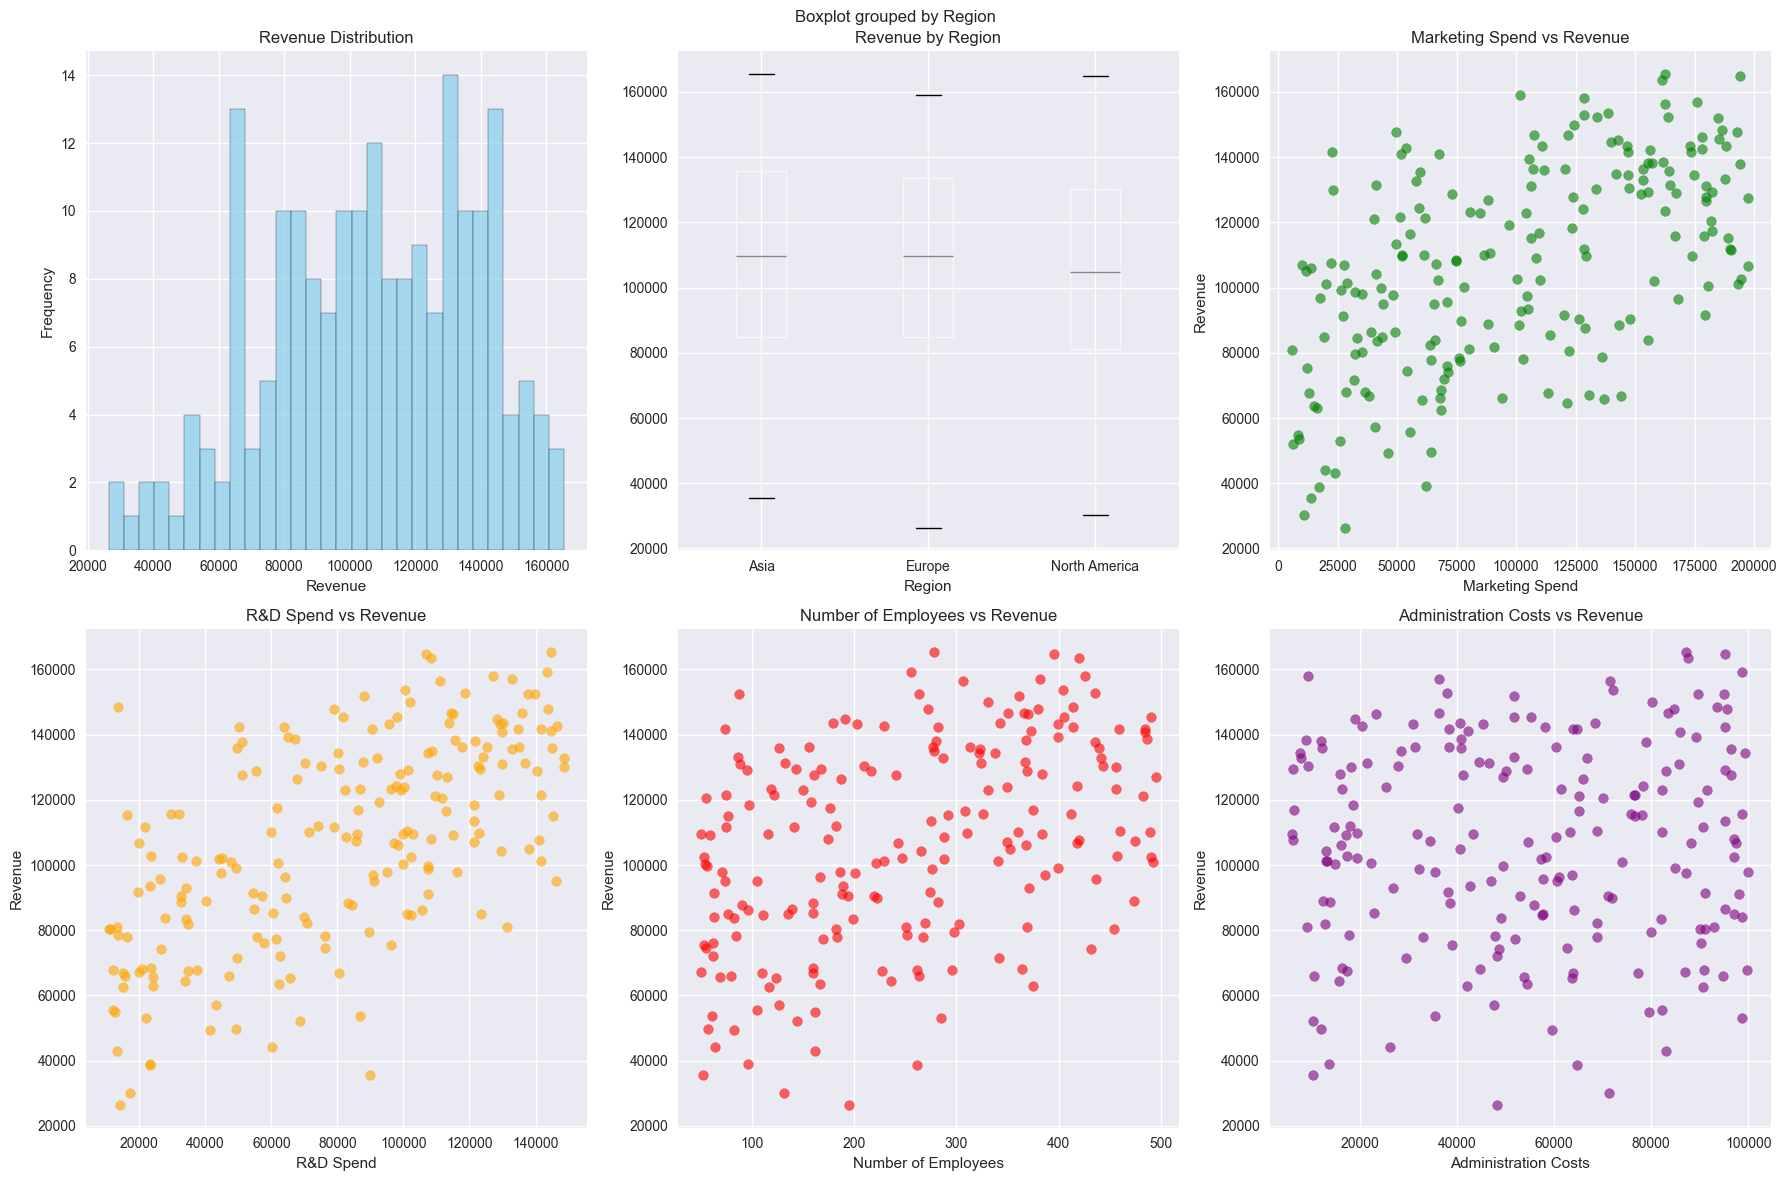

In [6]:
# Create visualizations
fig, axes = plt.subplots(2, 3, figsize=(18, 12))
fig.suptitle('Exploratory Data Analysis', fontsize=16, fontweight='bold')

# Revenue distribution
axes[0, 0].hist(df['Revenue'], bins=30, alpha=0.7, color='skyblue', edgecolor='black')
axes[0, 0].set_title('Revenue Distribution')
axes[0, 0].set_xlabel('Revenue')
axes[0, 0].set_ylabel('Frequency')

# Revenue by Region
df.boxplot(column='Revenue', by='Region', ax=axes[0, 1])
axes[0, 1].set_title('Revenue by Region')
axes[0, 1].set_xlabel('Region')

# Marketing Spend vs Revenue
axes[0, 2].scatter(df['Marketing_Spend'], df['Revenue'], alpha=0.6, color='green')
axes[0, 2].set_title('Marketing Spend vs Revenue')
axes[0, 2].set_xlabel('Marketing Spend')
axes[0, 2].set_ylabel('Revenue')

# R&D Spend vs Revenue
axes[1, 0].scatter(df['R&D_Spend'], df['Revenue'], alpha=0.6, color='orange')
axes[1, 0].set_title('R&D Spend vs Revenue')
axes[1, 0].set_xlabel('R&D Spend')
axes[1, 0].set_ylabel('Revenue')

# Number of Employees vs Revenue
axes[1, 1].scatter(df['Number_of_Employees'], df['Revenue'], alpha=0.6, color='red')
axes[1, 1].set_title('Number of Employees vs Revenue')
axes[1, 1].set_xlabel('Number of Employees')
axes[1, 1].set_ylabel('Revenue')

# Administration Costs vs Revenue
axes[1, 2].scatter(df['Administration_Costs'], df['Revenue'], alpha=0.6, color='purple')
axes[1, 2].set_title('Administration Costs vs Revenue')
axes[1, 2].set_xlabel('Administration Costs')
axes[1, 2].set_ylabel('Revenue')

plt.tight_layout()
plt.show()

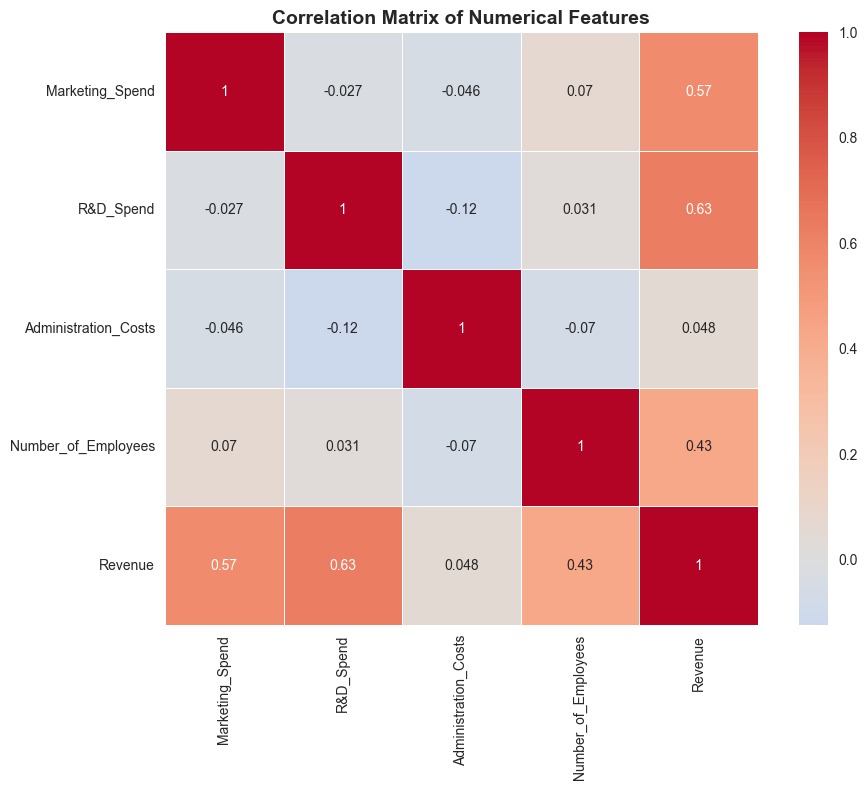

In [7]:
# Correlation matrix
plt.figure(figsize=(10, 8))
correlation_matrix = df.select_dtypes(include=[np.number]).corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', center=0, 
            square=True, linewidths=0.5)
plt.title('Correlation Matrix of Numerical Features', fontsize=14, fontweight='bold')
plt.tight_layout()
plt.show()

## 4. Data Preprocessing

In [8]:
# Separate features and target variable
X = df.drop('Revenue', axis=1)
y = df['Revenue']

print(f"Features shape: {X.shape}")
print(f"Target shape: {y.shape}")
print("\nFeature columns:")
print(X.columns.tolist())

Features shape: (200, 5)
Target shape: (200,)

Feature columns:
['Marketing_Spend', 'R&D_Spend', 'Administration_Costs', 'Number_of_Employees', 'Region']


In [9]:
# Define preprocessing steps
numeric_features = ['Marketing_Spend', 'R&D_Spend', 'Administration_Costs', 'Number_of_Employees']
categorical_features = ['Region']

# Create transformers
numeric_transformer = StandardScaler()
categorical_transformer = OneHotEncoder(drop='first', sparse_output=False)

# Create preprocessing pipeline
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numeric_features),
        ('cat', categorical_transformer, categorical_features)
    ]
)

print("Preprocessing pipeline created successfully!")
print(f"Numeric features: {numeric_features}")
print(f"Categorical features: {categorical_features}")

Preprocessing pipeline created successfully!
Numeric features: ['Marketing_Spend', 'R&D_Spend', 'Administration_Costs', 'Number_of_Employees']
Categorical features: ['Region']


## 5. Model Training

In [10]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

print(f"Training set size: {X_train.shape[0]} samples")
print(f"Testing set size: {X_test.shape[0]} samples")
print(f"Training set percentage: {(X_train.shape[0] / len(X)) * 100:.1f}%")
print(f"Testing set percentage: {(X_test.shape[0] / len(X)) * 100:.1f}%")

Training set size: 160 samples
Testing set size: 40 samples
Training set percentage: 80.0%
Testing set percentage: 20.0%


In [11]:
# Create and train the complete pipeline
model_pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('regressor', LinearRegression())
])

# Train the model
print("Training the Linear Regression model...")
model_pipeline.fit(X_train, y_train)
print("Model training completed!")

# Get feature names after preprocessing
feature_names = (numeric_features + 
                list(model_pipeline.named_steps['preprocessor']
                    .named_transformers_['cat']
                    .get_feature_names_out(categorical_features)))

print(f"\nTotal features after preprocessing: {len(feature_names)}")
print(f"Feature names: {feature_names}")

Training the Linear Regression model...
Model training completed!

Total features after preprocessing: 6
Feature names: ['Marketing_Spend', 'R&D_Spend', 'Administration_Costs', 'Number_of_Employees', 'Region_Europe', 'Region_North America']


In [12]:
# Display model coefficients
coefficients = model_pipeline.named_steps['regressor'].coef_
intercept = model_pipeline.named_steps['regressor'].intercept_

print("Linear Regression Model Coefficients:")
print(f"Intercept: {intercept:.2f}")
print("\nFeature Coefficients:")
for feature, coef in zip(feature_names, coefficients):
    print(f"{feature}: {coef:.2f}")

Linear Regression Model Coefficients:
Intercept: 106750.52

Feature Coefficients:
Marketing_Spend: 18195.56
R&D_Spend: 20863.58
Administration_Costs: 5746.33
Number_of_Employees: 11869.07
Region_Europe: 1705.35
Region_North America: -2032.47


## 6. Model Evaluation

In [13]:
# Make predictions
y_train_pred = model_pipeline.predict(X_train)
y_test_pred = model_pipeline.predict(X_test)

# Calculate metrics for training set
train_mae = mean_absolute_error(y_train, y_train_pred)
train_rmse = np.sqrt(mean_squared_error(y_train, y_train_pred))
train_r2 = r2_score(y_train, y_train_pred)

# Calculate metrics for testing set
test_mae = mean_absolute_error(y_test, y_test_pred)
test_rmse = np.sqrt(mean_squared_error(y_test, y_test_pred))
test_r2 = r2_score(y_test, y_test_pred)

# Display evaluation metrics
print("=" * 50)
print("MODEL EVALUATION RESULTS")
print("=" * 50)
print(f"\nTraining Set Metrics:")
print(f"MAE (Mean Absolute Error): ${train_mae:,.2f}")
print(f"RMSE (Root Mean Squared Error): ${train_rmse:,.2f}")
print(f"R² (R-squared): {train_r2:.4f}")

print(f"\nTesting Set Metrics:")
print(f"MAE (Mean Absolute Error): ${test_mae:,.2f}")
print(f"RMSE (Root Mean Squared Error): ${test_rmse:,.2f}")
print(f"R² (R-squared): {test_r2:.4f}")

print(f"\nModel Performance Summary:")
print(f"The model explains {test_r2*100:.2f}% of the variance in revenue.")
print(f"On average, predictions are off by ${test_mae:,.2f}.")

MODEL EVALUATION RESULTS

Training Set Metrics:
MAE (Mean Absolute Error): $7,712.82
RMSE (Root Mean Squared Error): $9,720.02
R² (R-squared): 0.9029

Testing Set Metrics:
MAE (Mean Absolute Error): $6,648.40
RMSE (Root Mean Squared Error): $8,363.06
R² (R-squared): 0.9330

Model Performance Summary:
The model explains 93.30% of the variance in revenue.
On average, predictions are off by $6,648.40.


## 7. Model Performance Visualization

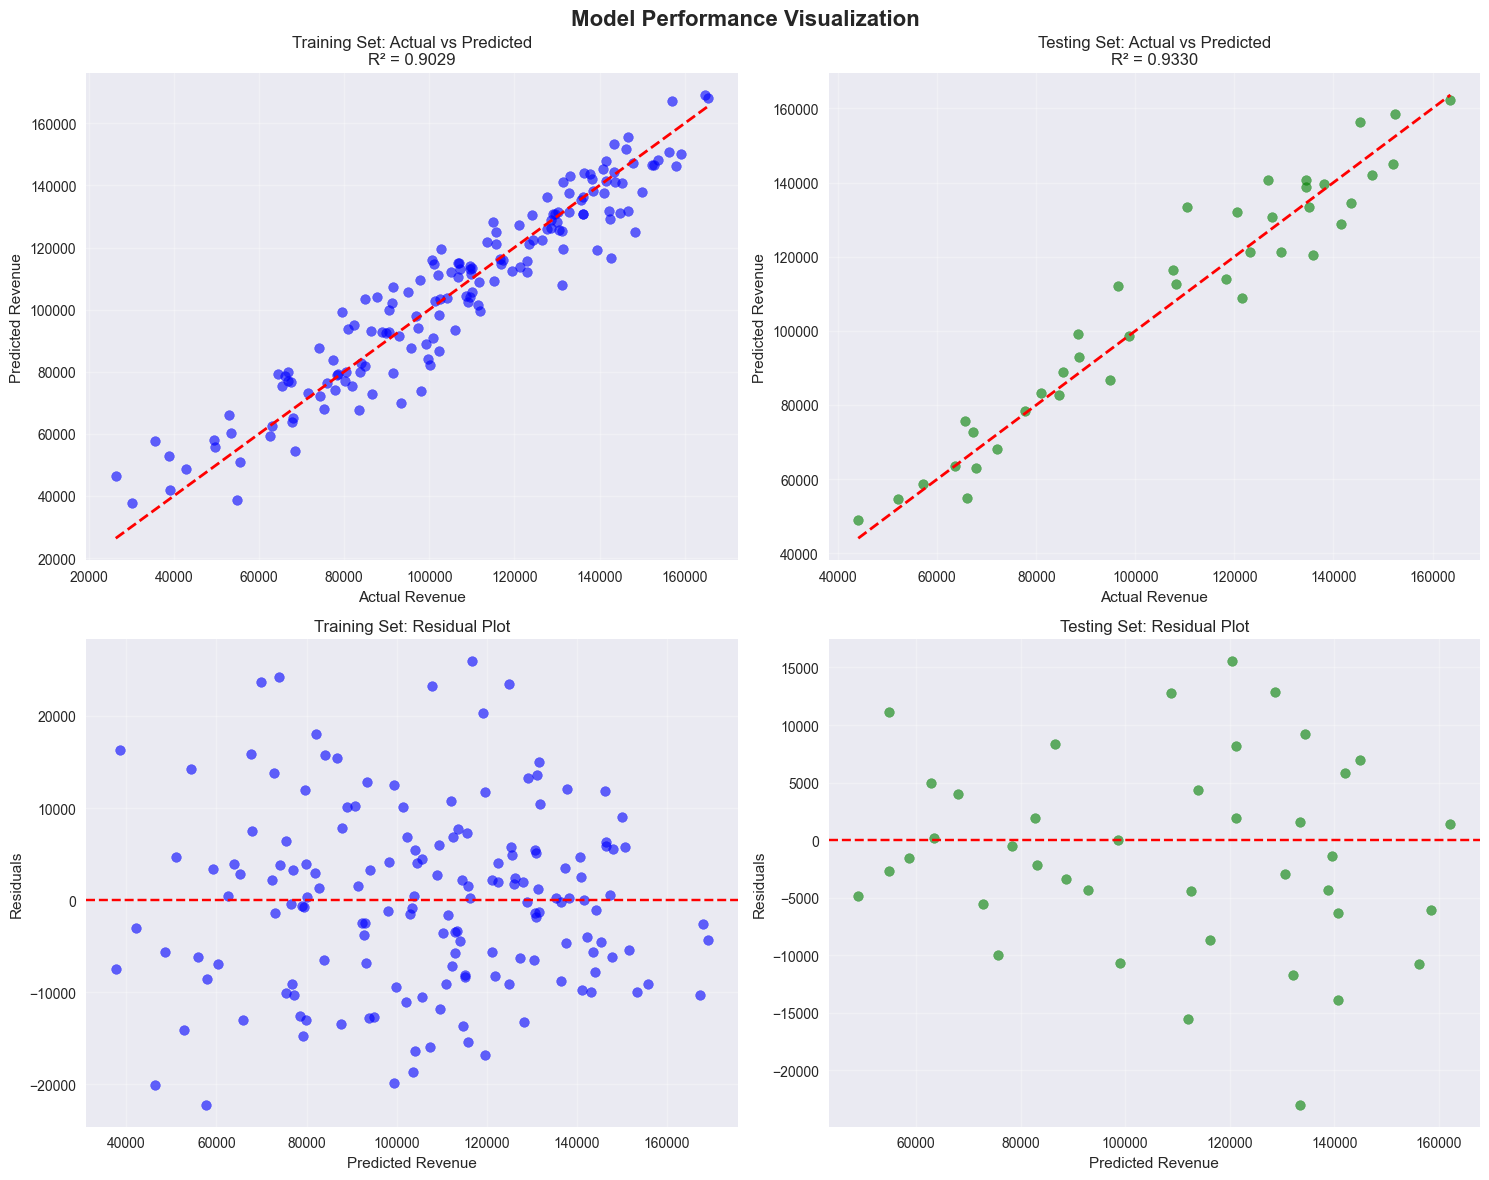

In [14]:
# Create performance visualization plots
fig, axes = plt.subplots(2, 2, figsize=(15, 12))
fig.suptitle('Model Performance Visualization', fontsize=16, fontweight='bold')

# Actual vs Predicted (Training Set)
axes[0, 0].scatter(y_train, y_train_pred, alpha=0.6, color='blue')
axes[0, 0].plot([y_train.min(), y_train.max()], [y_train.min(), y_train.max()], 'r--', lw=2)
axes[0, 0].set_xlabel('Actual Revenue')
axes[0, 0].set_ylabel('Predicted Revenue')
axes[0, 0].set_title(f'Training Set: Actual vs Predicted\nR² = {train_r2:.4f}')
axes[0, 0].grid(True, alpha=0.3)

# Actual vs Predicted (Testing Set)
axes[0, 1].scatter(y_test, y_test_pred, alpha=0.6, color='green')
axes[0, 1].plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2)
axes[0, 1].set_xlabel('Actual Revenue')
axes[0, 1].set_ylabel('Predicted Revenue')
axes[0, 1].set_title(f'Testing Set: Actual vs Predicted\nR² = {test_r2:.4f}')
axes[0, 1].grid(True, alpha=0.3)

# Residuals (Training Set)
train_residuals = y_train - y_train_pred
axes[1, 0].scatter(y_train_pred, train_residuals, alpha=0.6, color='blue')
axes[1, 0].axhline(y=0, color='r', linestyle='--')
axes[1, 0].set_xlabel('Predicted Revenue')
axes[1, 0].set_ylabel('Residuals')
axes[1, 0].set_title('Training Set: Residual Plot')
axes[1, 0].grid(True, alpha=0.3)

# Residuals (Testing Set)
test_residuals = y_test - y_test_pred
axes[1, 1].scatter(y_test_pred, test_residuals, alpha=0.6, color='green')
axes[1, 1].axhline(y=0, color='r', linestyle='--')
axes[1, 1].set_xlabel('Predicted Revenue')
axes[1, 1].set_ylabel('Residuals')
axes[1, 1].set_title('Testing Set: Residual Plot')
axes[1, 1].grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

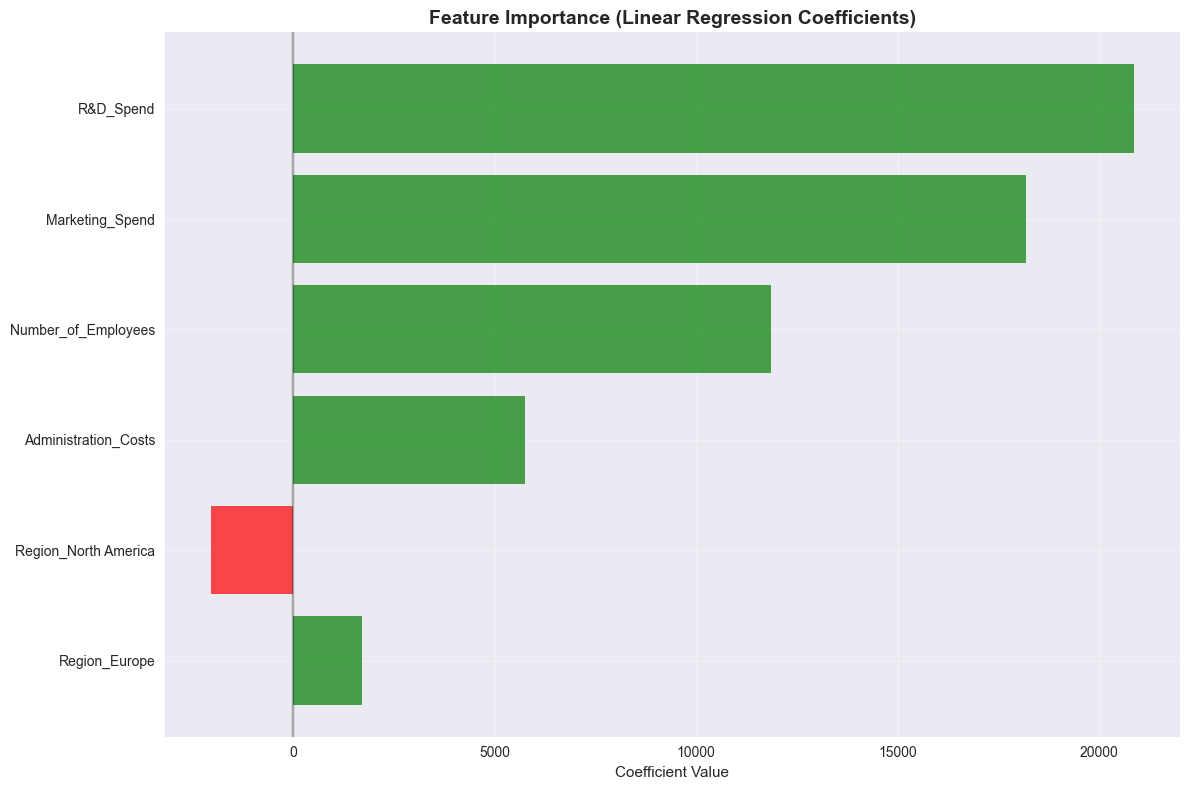

Feature Importance Analysis:
                Feature   Coefficient  Abs_Coefficient
1             R&D_Spend  20863.575213     20863.575213
0       Marketing_Spend  18195.562380     18195.562380
3   Number_of_Employees  11869.074611     11869.074611
2  Administration_Costs   5746.334112      5746.334112
5  Region_North America  -2032.469298      2032.469298
4         Region_Europe   1705.349104      1705.349104


In [15]:
# Feature importance visualization
plt.figure(figsize=(12, 8))
feature_importance = pd.DataFrame({
    'Feature': feature_names,
    'Coefficient': coefficients,
    'Abs_Coefficient': np.abs(coefficients)
})
feature_importance = feature_importance.sort_values('Abs_Coefficient', ascending=True)

colors = ['red' if x < 0 else 'green' for x in feature_importance['Coefficient']]
plt.barh(feature_importance['Feature'], feature_importance['Coefficient'], color=colors, alpha=0.7)
plt.xlabel('Coefficient Value')
plt.title('Feature Importance (Linear Regression Coefficients)', fontsize=14, fontweight='bold')
plt.axvline(x=0, color='black', linestyle='-', alpha=0.3)
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

print("Feature Importance Analysis:")
print(feature_importance.sort_values('Abs_Coefficient', ascending=False))

## 8. Predictions on New Data

In [16]:
# Function to predict revenue for new data
def predict_revenue(marketing_spend, rd_spend, admin_costs, num_employees, region):
    """
    Predict revenue based on input features
    """
    # Create input dataframe
    input_data = pd.DataFrame({
        'Marketing_Spend': [marketing_spend],
        'R&D_Spend': [rd_spend],
        'Administration_Costs': [admin_costs],
        'Number_of_Employees': [num_employees],
        'Region': [region]
    })
    
    # Make prediction
    prediction = model_pipeline.predict(input_data)
    return prediction[0]

print("✅ predict_revenue() function defined successfully!")

# Test the function with a simple example
try:
    test_revenue = predict_revenue(100000, 80000, 30000, 200, 'North America')
    print(f"✅ Function test successful! Sample prediction: ${test_revenue:,.2f}")
except Exception as e:
    print(f"❌ Function test failed: {e}")

EXAMPLE REVENUE PREDICTIONS

Example 1 - High-performing company:
Marketing Spend: $150,000
R&D Spend: $120,000
Administration Costs: $50,000
Number of Employees: 300
Region: North America
Predicted Revenue: $144,202.65

Example 2 - Medium-performing company:
Marketing Spend: $80,000
R&D Spend: $60,000
Administration Costs: $40,000
Number of Employees: 150
Region: Europe
Predicted Revenue: $80,114.56

Example 3 - Small company:
Marketing Spend: $30,000
R&D Spend: $25,000
Administration Costs: $20,000
Number of Employees: 50
Region: Asia
Predicted Revenue: $32,001.80


In [ ]:
# Example predictions
print("=" * 60)
print("EXAMPLE REVENUE PREDICTIONS")
print("=" * 60)

# Example 1: High-performing company
example1_revenue = predict_revenue(
    marketing_spend=150000,
    rd_spend=120000,
    admin_costs=50000,
    num_employees=300,
    region='North America'
)
print(f"\nExample 1 - High-performing company:")
print(f"Marketing Spend: $150,000")
print(f"R&D Spend: $120,000")
print(f"Administration Costs: $50,000")
print(f"Number of Employees: 300")
print(f"Region: North America")
print(f"Predicted Revenue: ${example1_revenue:,.2f}")

# Example 2: Medium-performing company
example2_revenue = predict_revenue(
    marketing_spend=80000,
    rd_spend=60000,
    admin_costs=40000,
    num_employees=150,
    region='Europe'
)
print(f"\nExample 2 - Medium-performing company:")
print(f"Marketing Spend: $80,000")
print(f"R&D Spend: $60,000")
print(f"Administration Costs: $40,000")
print(f"Number of Employees: 150")
print(f"Region: Europe")
print(f"Predicted Revenue: ${example2_revenue:,.2f}")

# Example 3: Small company
example3_revenue = predict_revenue(
    marketing_spend=30000,
    rd_spend=25000,
    admin_costs=20000,
    num_employees=50,
    region='Asia'
)
print(f"\nExample 3 - Small company:")
print(f"Marketing Spend: $30,000")
print(f"R&D Spend: $25,000")
print(f"Administration Costs: $20,000")
print(f"Number of Employees: 50")
print(f"Region: Asia")
print(f"Predicted Revenue: ${example3_revenue:,.2f}")

## 9. Interactive Revenue Prediction System

In [ ]:
# Interactive prediction function
def interactive_revenue_prediction():
    """
    Interactive system for revenue prediction
    """
    print("\n" + "=" * 60)
    print("INTERACTIVE REVENUE PREDICTION SYSTEM")
    print("=" * 60)
    print("Enter company details to predict revenue:")
    
    while True:
        try:
            print("\n" + "-" * 40)
            
            # Get user input
            marketing_spend = float(input("Enter Marketing Spend ($): "))
            rd_spend = float(input("Enter R&D Spend ($): "))
            admin_costs = float(input("Enter Administration Costs ($): "))
            num_employees = int(input("Enter Number of Employees: "))
            
            print("\nAvailable regions: North America, Europe, Asia")
            region = input("Enter Region: ").strip()
            
            # Validate region input
            valid_regions = ['North America', 'Europe', 'Asia']
            if region not in valid_regions:
                print(f"Invalid region. Please choose from: {valid_regions}")
                continue
            
            # Make prediction
            predicted_revenue = predict_revenue(
                marketing_spend, rd_spend, admin_costs, num_employees, region
            )
            
            # Display results
            print("\n" + "=" * 40)
            print("PREDICTION RESULTS")
            print("=" * 40)
            print(f"Marketing Spend: ${marketing_spend:,.2f}")
            print(f"R&D Spend: ${rd_spend:,.2f}")
            print(f"Administration Costs: ${admin_costs:,.2f}")
            print(f"Number of Employees: {num_employees:,}")
            print(f"Region: {region}")
            print(f"\n🎯 PREDICTED REVENUE: ${predicted_revenue:,.2f}")
            
            # Ask if user wants to continue
            continue_choice = input("\nDo you want to make another prediction? (y/n): ").lower().strip()
            if continue_choice not in ['y', 'yes']:
                print("\nThank you for using the Revenue Prediction System!")
                break
                
        except ValueError:
            print("\nInvalid input. Please enter numerical values for monetary amounts and employee count.")
        except Exception as e:
            print(f"\nAn error occurred: {e}")
            print("Please try again.")

interactive_revenue_prediction()


INTERACTIVE REVENUE PREDICTION SYSTEM
Enter company details to predict revenue:

----------------------------------------

Available regions: North America, Europe, Asia
Invalid region. Please choose from: ['North America', 'Europe', 'Asia']

----------------------------------------

Invalid input. Please enter numerical values for monetary amounts and employee count.

----------------------------------------

Invalid input. Please enter numerical values for monetary amounts and employee count.

----------------------------------------

Invalid input. Please enter numerical values for monetary amounts and employee count.

----------------------------------------

Invalid input. Please enter numerical values for monetary amounts and employee count.

----------------------------------------

Invalid input. Please enter numerical values for monetary amounts and employee count.

----------------------------------------

Invalid input. Please enter numerical values for monetary amounts and

## 10. Model Summary and Insights

In [18]:
# Final model summary
print("\n" + "=" * 70)
print("REVENUE PREDICTION MODEL - FINAL SUMMARY")
print("=" * 70)

print(f"\n📊 Dataset Information:")
print(f"   • Total samples: {len(df):,}")
print(f"   • Features: {len(X.columns)}")
print(f"   • Regions covered: {', '.join(df['Region'].unique())}")

print(f"\n🤖 Model Performance:")
print(f"   • Algorithm: Linear Regression")
print(f"   • Training R²: {train_r2:.4f} ({train_r2*100:.2f}%)")
print(f"   • Testing R²: {test_r2:.4f} ({test_r2*100:.2f}%)")
print(f"   • Testing MAE: ${test_mae:,.2f}")
print(f"   • Testing RMSE: ${test_rmse:,.2f}")

print(f"\n🔍 Key Insights:")
top_features = feature_importance.nlargest(3, 'Abs_Coefficient')
print(f"   • Most influential features:")
for idx, row in top_features.iterrows():
    impact = "positive" if row['Coefficient'] > 0 else "negative"
    print(f"     - {row['Feature']}: {impact} impact (coef: {row['Coefficient']:.2f})")

print(f"\n💡 Business Recommendations:")
print(f"   • Focus on features with highest positive coefficients for revenue growth")
print(f"   • The model can predict revenue with {test_r2*100:.1f}% accuracy")
print(f"   • Average prediction error is ${test_mae:,.0f}")

print(f"\n🎯 Model Usage:")
print(f"   • Use predict_revenue() function for single predictions")
print(f"   • Use interactive_revenue_prediction() for continuous predictions")
print(f"   • Model handles preprocessing automatically")

print("\n" + "=" * 70)
print("MODEL READY FOR PRODUCTION USE!")
print("=" * 70)


REVENUE PREDICTION MODEL - FINAL SUMMARY

📊 Dataset Information:
   • Total samples: 200
   • Features: 5
   • Regions covered: North America, Asia, Europe

🤖 Model Performance:
   • Algorithm: Linear Regression
   • Training R²: 0.9029 (90.29%)
   • Testing R²: 0.9330 (93.30%)
   • Testing MAE: $6,648.40
   • Testing RMSE: $8,363.06

🔍 Key Insights:
   • Most influential features:
     - R&D_Spend: positive impact (coef: 20863.58)
     - Marketing_Spend: positive impact (coef: 18195.56)
     - Number_of_Employees: positive impact (coef: 11869.07)

💡 Business Recommendations:
   • Focus on features with highest positive coefficients for revenue growth
   • The model can predict revenue with 93.3% accuracy
   • Average prediction error is $6,648

🎯 Model Usage:
   • Use predict_revenue() function for single predictions
   • Use interactive_revenue_prediction() for continuous predictions
   • Model handles preprocessing automatically

MODEL READY FOR PRODUCTION USE!


## 11. Export Model for Web Integration

In [ ]:
import joblib
import os

# Create models directory
os.makedirs('revenuecast/models', exist_ok=True)

# Save the trained model pipeline
model_path = 'revenuecast/models/revenue_model.pkl'
joblib.dump(model_pipeline, model_path)

# Save model metadata
model_metadata = {
    'model_type': 'Linear Regression',
    'features': feature_names,
    'test_r2': test_r2,
    'test_mae': test_mae,
    'test_rmse': test_rmse,
    'training_date': pd.Timestamp.now().isoformat(),
    'dataset_size': len(df)
}

import json
with open('revenuecast/models/model_metadata.json', 'w') as f:
    json.dump(model_metadata, f, indent=2)

print("✅ Model exported successfully!")
print(f"📁 Model saved to: {model_path}")
print(f"📊 Model metadata saved")
print(f"🎯 Model Performance: R² = {test_r2:.4f}, MAE = ${test_mae:,.2f}")

## 🚀 Quick Start Guide

### To use this model:

1. **Run all cells above** to train the model
2. **For single predictions**: Use the `predict_revenue()` function
3. **For interactive mode**: Uncomment and run `interactive_revenue_prediction()`

### Example usage:
```python
# Single prediction
revenue = predict_revenue(
    marketing_spend=100000,
    rd_spend=80000,
    admin_costs=30000,
    num_employees=200,
    region='North America'
)
print(f"Predicted Revenue: ${revenue:,.2f}")
```

### Model Features:
- ✅ **Preprocessing**: Automatic scaling and encoding
- ✅ **Validation**: Train/test split with performance metrics
- ✅ **Visualization**: Comprehensive plots and analysis
- ✅ **Interactive**: User-friendly prediction interface
- ✅ **Production Ready**: Complete pipeline with error handling

---
*This notebook provides a complete end-to-end machine learning solution for revenue prediction using Linear Regression.*